# Eksperymenty z technikami regresji w Scikit-Learn

1. Pobierz zbiór danych o nazwie odpowiadającej Twojemu numerowi albumu. Te dane dotyczą wykrywania anomalii (zakłóceń) w sygnale audio; każdy wiersz opisuje inne wystąpienie anomalii, a ostatnia kolumna to szerokość zakłócenia (liczba próbek). Pozostałe kolumny to różne statystyki zebrane z otoczenia zakłócenia; pierwszy wiersz zawiera skrótowe nazwy kolumn. Szczegółowy opis znaczenia atrybutów znajdziesz tutaj. Możesz wczytać plik używając dane = np.genfromtxt(nazwa_pliku, skip_header=1) albo parametru names=True (wtedy uwaga). Przeprowadź jego wstępną eksplorację: liczba i rodzaje atrybutów, ich zakresy i rozkłady wartości. Pokaż rozkłady wartości wszystkich atrybutów warunkowych obok siebie na jednym szerokim wykresie pudełkowym lub skrzypcowym; na osi poziomej umieść nazwy atrybutów. Opisując wnioski (wystarczy kilka zdań) możesz pogrupować (o ile to możliwe) atrybuty pisząc np. "73 atrybuty są takie a takie, 22 atrybuty charakteryzują się tym a tym, wyjątkowy jest atrybut taki a taki", itp. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
df = pd.read_csv("data.txt", sep='\t')
df.head()

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,...,stat36,stat37,stat38,stat39,stat40,stat41,stat42,stat43,stat44,class
0,0.020189,0.25726,0.38736,0.387890,0.464570,0.357250,0.312620,0.365640,0.425760,0.419040,...,-0.022772,-0.003157,0.086648,0.162140,-0.045450,-0.048423,-0.027468,-0.002179,1.9585,1176.0
1,0.013661,0.14845,0.16227,0.206140,0.236170,0.140620,0.231130,0.392950,0.361040,0.591160,...,0.040610,0.047109,-0.024958,0.232330,-0.035617,-0.027758,-0.043654,0.046506,1.8889,667.5
2,0.014796,0.45579,0.27055,0.230490,0.209950,0.203920,0.252290,0.304380,0.241070,0.194490,...,0.102060,-0.021022,0.078548,0.084422,-0.044822,-0.053044,-0.041558,-0.040908,2.0264,667.0
3,0.008854,0.18426,0.16577,0.140080,0.184000,0.233230,0.237610,0.230900,0.246600,0.202560,...,0.478420,0.020751,0.356870,0.250270,0.182270,-0.028150,0.112360,0.039815,1.8630,388.5
4,0.008256,0.52522,0.22274,0.084596,0.042223,0.033447,0.026923,0.024478,0.021736,0.017872,...,0.479680,0.557510,0.536520,0.740160,0.174400,0.227480,0.214410,0.508170,0.8238,254.5


In [3]:
df.describe()

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,...,stat36,stat37,stat38,stat39,stat40,stat41,stat42,stat43,stat44,class
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,...,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,0.011588,0.149042,0.185862,0.228578,0.256914,0.276172,0.306449,0.288383,0.247492,0.184631,...,0.239022,0.132221,0.219593,0.263528,0.035598,-0.011793,0.023863,0.053337,1.666996,461.063205
std,0.003949,0.091182,0.117950,0.145457,0.158899,0.190354,0.192188,0.167922,0.161698,0.152684,...,0.151314,0.135396,0.132695,0.162628,0.072526,0.046123,0.061205,0.116530,0.308056,301.496495
min,0.004847,0.023790,0.021056,0.025810,0.022698,0.020322,0.011677,0.008365,0.011228,0.007392,...,-0.136220,-0.145390,-0.094293,-0.068564,-0.055178,-0.060871,-0.061136,-0.050440,0.670310,36.000000
25%,0.008757,0.090367,0.114680,0.132800,0.133145,0.132560,0.158005,0.171900,0.107715,0.044535,...,0.129385,0.024625,0.133045,0.150320,-0.019867,-0.042942,-0.019563,-0.017522,1.501200,255.250000
50%,0.010476,0.120780,0.150280,0.184550,0.220610,0.214820,0.259740,0.260000,0.241440,0.161800,...,0.242900,0.127460,0.221430,0.234490,0.021016,-0.028775,0.010124,0.012593,1.727900,401.500000
75%,0.014044,0.176665,0.218475,0.276455,0.350055,0.366455,0.415060,0.386860,0.340475,0.286535,...,0.334805,0.217930,0.308790,0.330925,0.075522,0.003776,0.050729,0.071110,1.913150,592.000000
max,0.030060,0.624960,0.733400,0.744360,0.832720,0.872450,0.833930,0.836880,0.828430,0.694520,...,0.625120,0.557510,0.631220,0.894510,0.292520,0.229120,0.299300,0.698250,2.143700,3056.000000


In [4]:
df.isna().sum().sum()

0

In [5]:
df.dtypes

dissim    float64
el0       float64
el1       float64
el2       float64
el3       float64
           ...   
stat41    float64
stat42    float64
stat43    float64
stat44    float64
class     float64
Length: 78, dtype: object

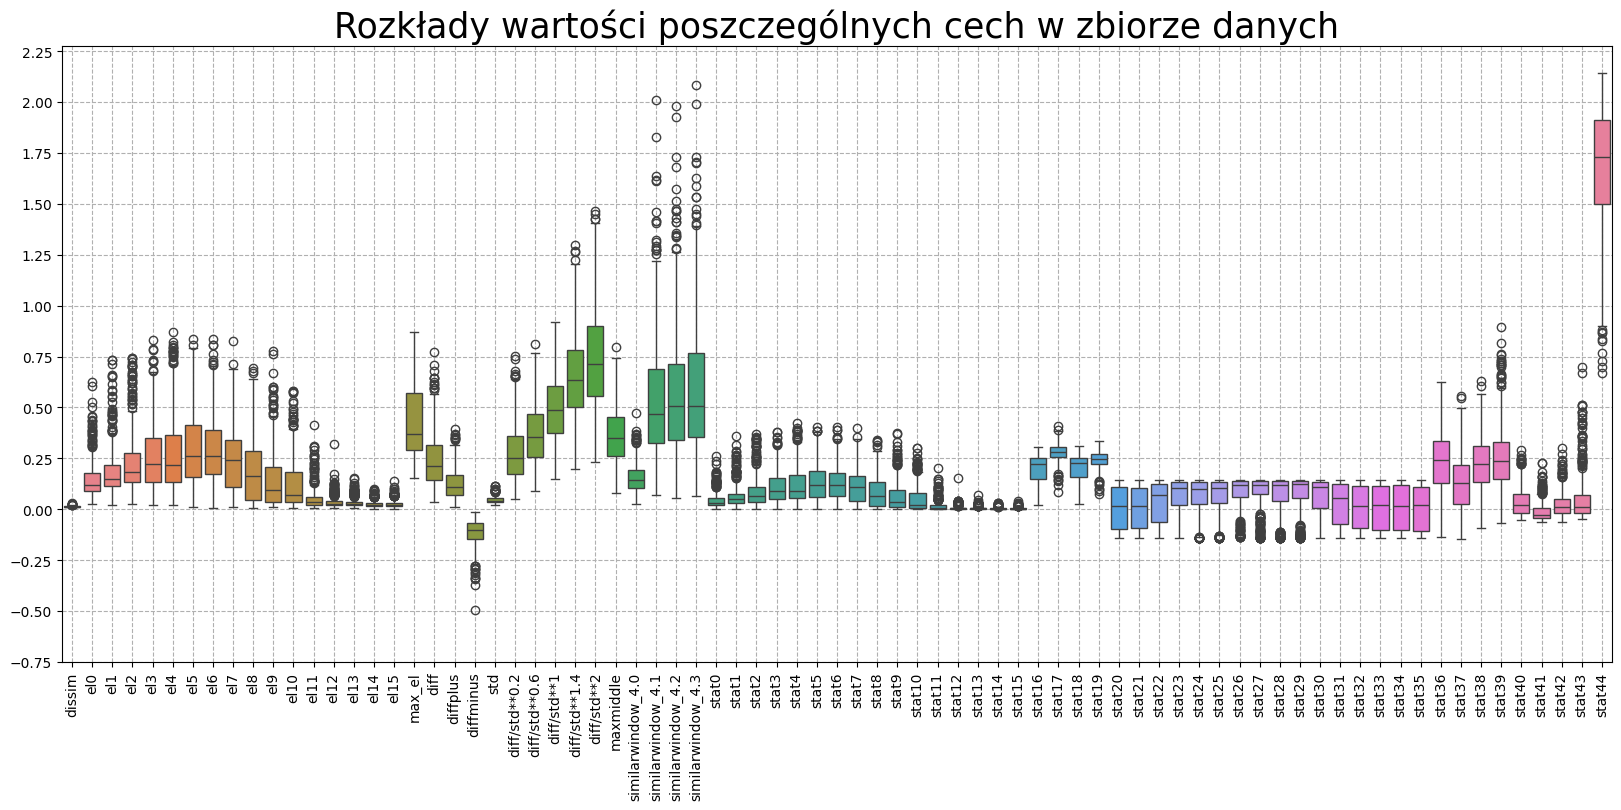

In [6]:
df_plot = df.drop(columns=['class'])
plt.figure(figsize=(20, 8))

p = sns.boxplot(data=df_plot)
_ = p.set(yticks=np.arange(-0.75, 2.5, 0.25))

plt.xticks(rotation=90)
plt.title("Rozkłady wartości poszczególnych cech w zbiorze danych", fontsize=25)
plt.grid(linestyle='--')
plt.savefig("rozklad.png")
plt.show();

In [7]:
df['stat44'].describe()

count    443.000000
mean       1.666996
std        0.308056
min        0.670310
25%        1.501200
50%        1.727900
75%        1.913150
max        2.143700
Name: stat44, dtype: float64

In [8]:
df['class'].describe()

count     443.000000
mean      461.063205
std       301.496495
min        36.000000
25%       255.250000
50%       401.500000
75%       592.000000
max      3056.000000
Name: class, dtype: float64

W zbiorze znajdują się 443 próbki z których każda posiada 77 atrybutów warunkowych oraz 1 atrybut który jest zmienną zależną. Warto zauważyć że w zbiorze danych nie występują wartości puste - NaN lub NULL, co znacznie ułatwia działanie ze zbiorem danych, ponieważ nie ma potrzeby wypełniania takich pustych wartości spreparowanymi sztucznie danymi lub co gorsze - usuwania całych próbek. Jeżeli chodzi o atrybuty to są one wszystkie liczbami rzeczywistymi z przedziału około -0.5 do maksymalnie około 2.25. Większość z atrybutów ma wartości bliskie 0 (głównie atrybuty el, stat0-stat15 oraz stat20-stat34). Nieco większe wartości (ze średnią w okolicach 0.5) mają atrybuty rozpoczynające się od diff, max oraz similar. Atrybutem który zdecydowanie wyróżnia się na tle pozostałych jest stat44, który przyjmuje wartości z zakresu 0.67-2.14, a jego wartość średnia to 1.66.

Przejrzyj dostępne metryki oceny modeli regresji. Które z nich wydają Ci się łatwe do interpretacji i dlaczego? Weź pod uwagę konkretny problem, którym się zajmujemy (predykcja ostatniej kolumny w zbiorze i znaczenie tej kolumny). Wybierz dwie metryki, które Twoim zdaniem niosą użyteczną informację o jakości modelu w rozpatrywanym problemie (jeśli masz ochotę, możesz wybrać więcej niż dwie). W kolejnych pytaniach oznaczam te metryki jako M1 i M2. Uzasadnij swój wybór.

Wybrałem: 
- "Mean absolute error" - MAE - jest łatwy w interpretacji, możemy go wyjaśnić jako średni błąd jaki popełnia regresor, 
- "Mean absolute percentage error" - MAPE - działa podobnie jak mean absolute error, ale dzieli składniki sumy przez wartości yi dzięki czemu uwzględnia również małe błędy, a nie jedynie duże. Tutaj interpretacja nie jest już tak łatwa, ale można powiedzieć, że to procent w jakim myli się regresor.
- "Median absolute error" - MedAE - podobnie jak mean absolute error, ale zamiast średniej wybiera medianę. 
Zdecydowałem się na wybór tych trzech metryk ponieważ są one łatwo interpretowalne w przeciwieństwie do np. Mean Squared Error.



In [9]:
from sklearn import linear_model
from sklearn import neighbors  # KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_absolute_percentage_error

regressors = {
    'linear': linear_model.LinearRegression(),
    'ridge': linear_model.Ridge(),
    'lasso': linear_model.Lasso(),
    'knn': neighbors.KNeighborsRegressor(),
    'tree_max_depth_2': DecisionTreeRegressor(max_depth=2),
    'tree': DecisionTreeRegressor(),
    'nn': MLPRegressor(max_iter=4000),
    'svm_linear': SVR(kernel='linear'),
    'svm_rbf': SVR(kernel='rbf'),
    'forest': RandomForestRegressor()
}

X = df.drop(columns=['class'])
y = df['class']

df_metrics = pd.DataFrame(columns=['MAE', 'MAPE', 'MedAE'])
metrics = []
for name, regressor in regressors.items():
    regressor.fit(X, y)
    y_pred = regressor.predict(X)
    MAE, MAPE, MedAE = mean_absolute_error(y, y_pred), mean_absolute_percentage_error(y, y_pred), median_absolute_error(y, y_pred)
    metrics.append({'name': name, 'MAE': MAE, 'MAPE': MAPE, 'MedAE': MedAE})

df_metrics = pd.DataFrame(metrics)
df_metrics

,name,MAE,MAPE,MedAE
0,linear,163.113085,0.462476,123.590590
1,ridge,166.917818,0.453031,124.440750
2,lasso,172.495539,0.476656,133.525030
3,knn,149.790519,0.410938,101.700000
4,tree_max_depth_2,168.588908,0.479607,123.149254
5,tree,0.000000,0.000000,0.000000
6,nn,169.096508,0.449387,125.607123
7,svm_linear,190.172534,0.473095,144.722760
8,svm_rbf,197.584253,0.507182,153.564186
9,forest,65.974120,0.179849,48.840000


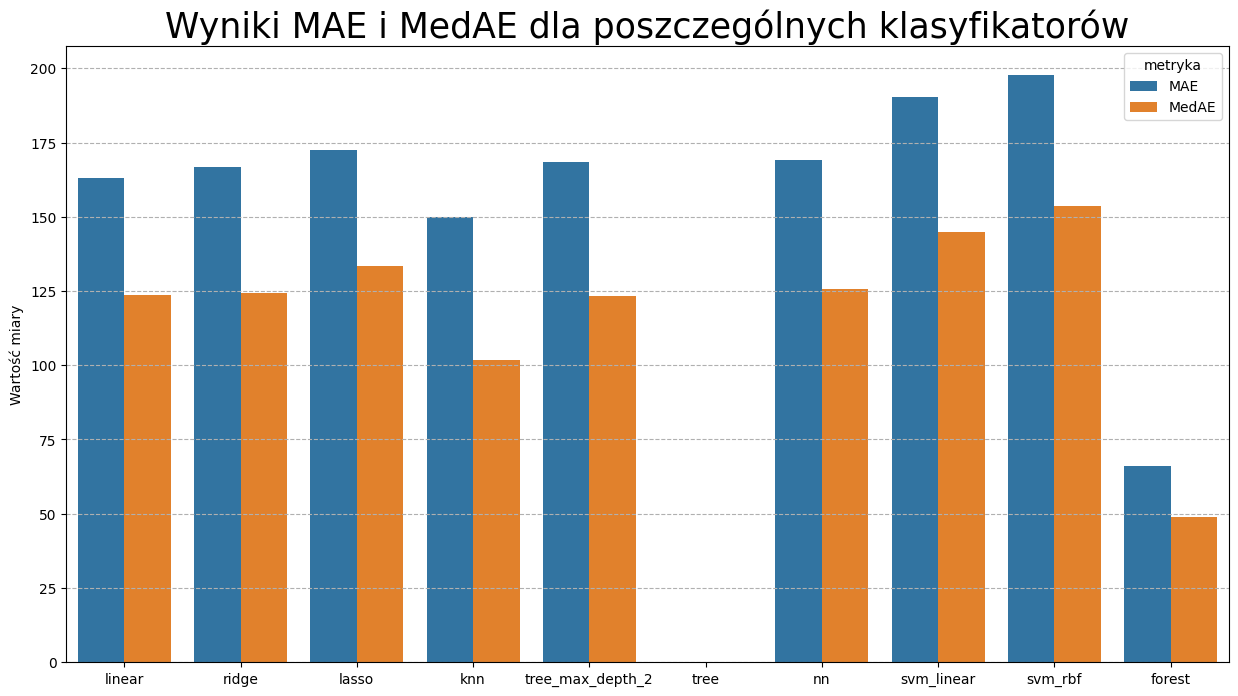

In [10]:
plt.figure(figsize=(15, 8))
df_melted = pd.melt(df_metrics.drop(columns='MAPE'), id_vars=['name'], var_name='metryka', value_name='metric_value')
ax = sns.barplot(data=df_melted, x='name', y='metric_value', hue='metryka')

# plt.xticks(rotation=90)
plt.title("Wyniki MAE i MedAE dla poszczególnych klasyfikatorów", fontsize=25)
plt.xlabel("")
plt.ylabel("Wartość miary")
plt.rc('axes', axisbelow=True)
plt.grid(linestyle='--', axis='y')
plt.savefig("metrics_mae_medae.png")
plt.show();

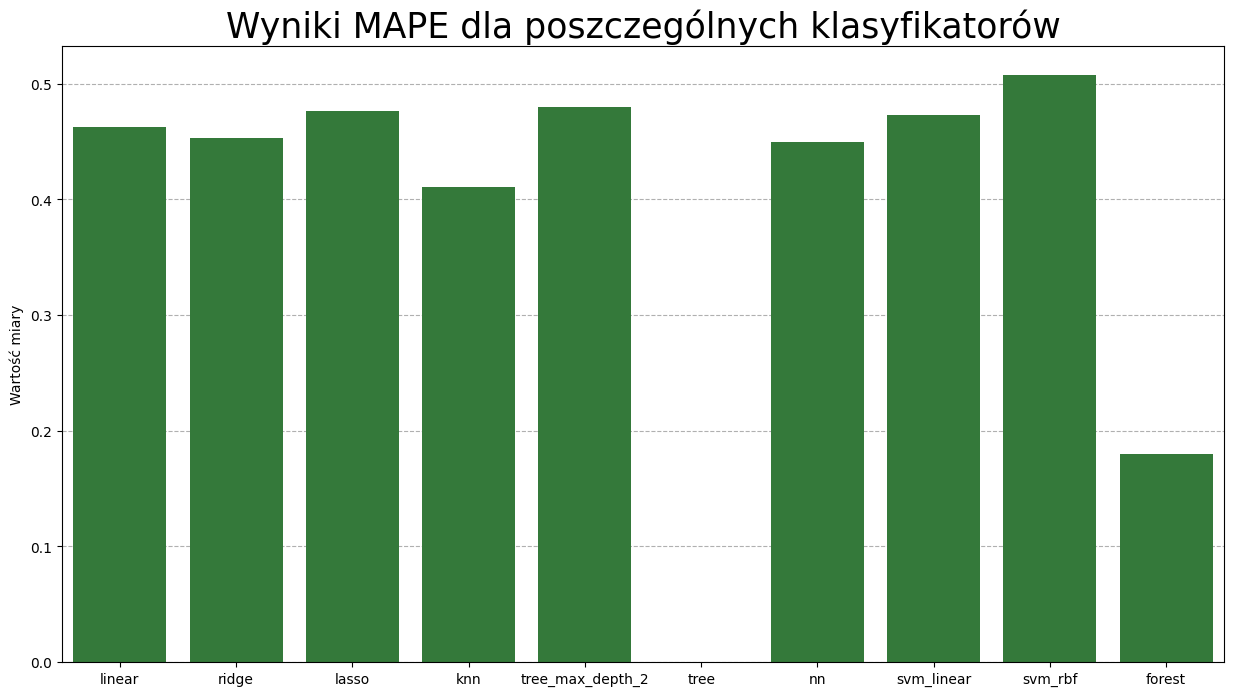

In [11]:
plt.figure(figsize=(15, 8))
df_melted = pd.melt(df_metrics.drop(columns=['MAE', 'MedAE']), id_vars=['name'], var_name='metryka', value_name='metric_value')
ax = sns.barplot(data=df_melted, x='name', y='metric_value', color='#288531')

# plt.xticks(rotation=90)
plt.title("Wyniki MAPE dla poszczególnych klasyfikatorów", fontsize=25)
plt.xlabel("")
plt.ylabel("Wartość miary")
plt.rc('axes', axisbelow=True)
plt.grid(linestyle='--', axis='y')
plt.savefig("metrics_mape.png")
plt.show();

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler  # albo inny, bardziej odpowiedni

regressors_std = {
    'linear_scaled': make_pipeline(StandardScaler(), linear_model.LinearRegression()),
    'ridge_scaled': make_pipeline(StandardScaler(), linear_model.Ridge()),
    'lasso_scaled': make_pipeline(StandardScaler(), linear_model.Lasso()),
    'knn_scaled': make_pipeline(StandardScaler(), neighbors.KNeighborsRegressor()),
    'tree_max_depth_2': DecisionTreeRegressor(max_depth=2),
    'tree': DecisionTreeRegressor(),
    'nn_scaled': make_pipeline(StandardScaler(), MLPRegressor(max_iter=10000)),
    'svm_linear_scaled': make_pipeline(StandardScaler(), SVR(kernel='linear')),
    'svm_rbf_scaled': make_pipeline(StandardScaler(), SVR(kernel='rbf')),
    'forest': RandomForestRegressor()
}

X = df.drop(columns=['class'])
y = df['class']

df_metrics = pd.DataFrame(columns=['MAE', 'MAPE', 'MedAE'])
metrics = []
for name, regressor in regressors_std.items():
    regressor.fit(X, y)
    y_pred = regressor.predict(X)
    MAE, MAPE, MedAE = mean_absolute_error(y, y_pred), mean_absolute_percentage_error(y, y_pred), median_absolute_error(y, y_pred)
    metrics.append({'name': name, 'MAE': MAE, 'MAPE': MAPE, 'MedAE': MedAE})

df_metrics_scaled = pd.DataFrame(metrics)
df_metrics_scaled

,name,MAE,MAPE,MedAE
0,linear_scaled,163.113085,0.462476,123.590590
1,ridge_scaled,163.840205,0.462374,123.839455
2,lasso_scaled,164.078628,0.458714,126.539031
3,knn_scaled,154.447178,0.427752,111.100000
4,tree_max_depth_2,168.588908,0.479607,123.149254
5,tree,0.000000,0.000000,0.000000
6,nn_scaled,0.772105,0.002129,0.480695
7,svm_linear_scaled,159.130748,0.364729,101.522422
8,svm_rbf_scaled,196.457018,0.502157,152.234342
9,forest,68.478115,0.190270,50.695000


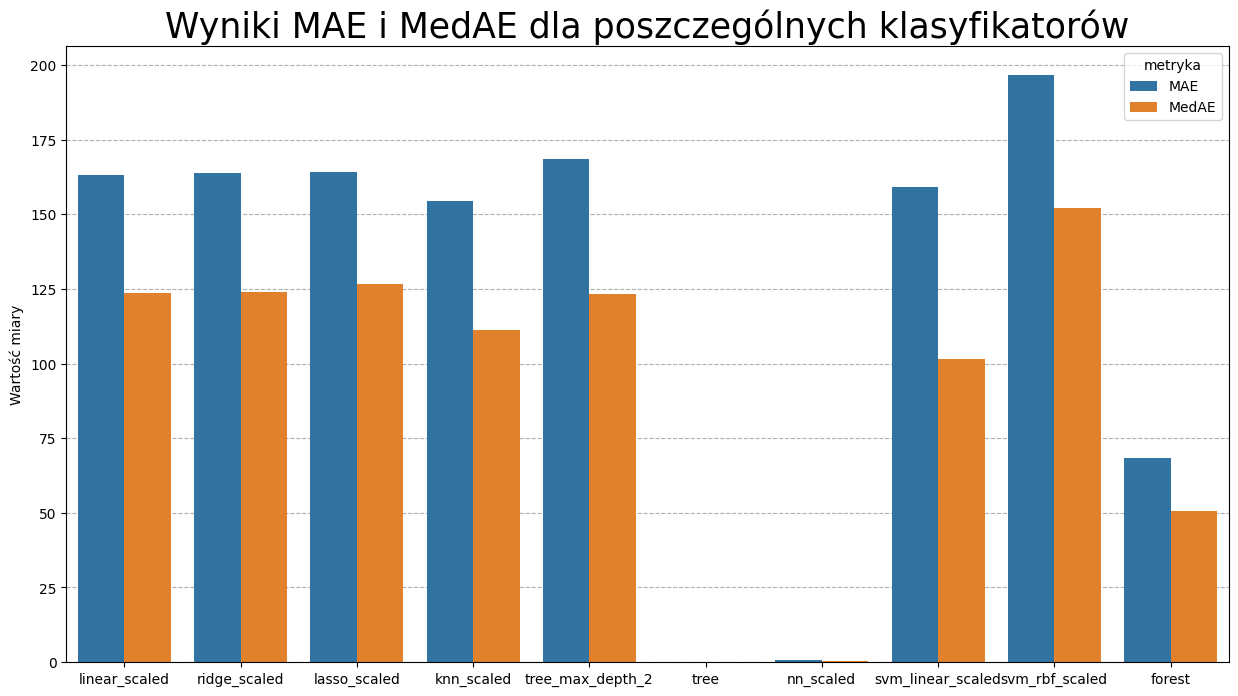

In [13]:
plt.figure(figsize=(15, 8))
df_melted = pd.melt(df_metrics_scaled.drop(columns='MAPE'), id_vars=['name'], var_name='metryka', value_name='metric_value')
ax = sns.barplot(data=df_melted, x='name', y='metric_value', hue='metryka')

# plt.xticks(rotation=90)
plt.title("Wyniki MAE i MedAE dla poszczególnych klasyfikatorów", fontsize=25)
plt.xlabel("")
plt.ylabel("Wartość miary")
plt.rc('axes', axisbelow=True)
plt.grid(linestyle='--', axis='y')
plt.savefig("metrics_mae_medae_scaled.png")
plt.show();

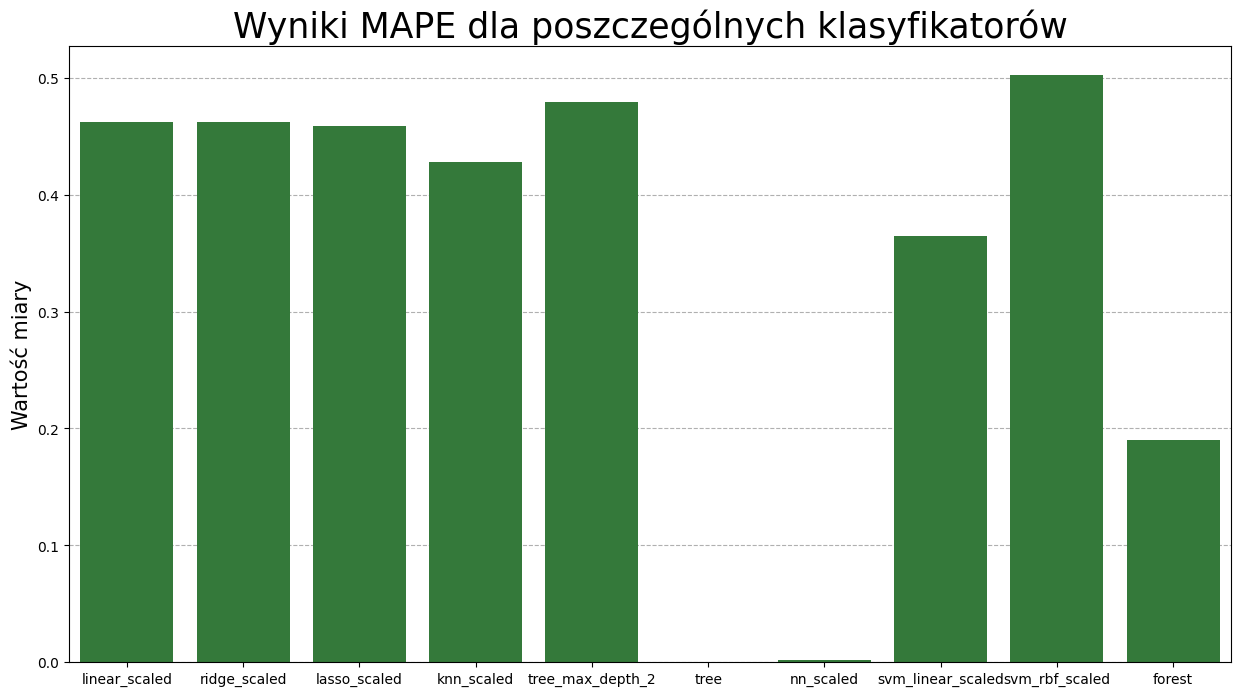

In [14]:
plt.figure(figsize=(15, 8))
df_melted = pd.melt(df_metrics_scaled.drop(columns=['MAE', 'MedAE']), id_vars=['name'], var_name='metryka', value_name='metric_value')
ax = sns.barplot(data=df_melted, x='name', y='metric_value', color='#288531')

# plt.xticks(rotation=90)
plt.title("Wyniki MAPE dla poszczególnych klasyfikatorów", fontsize=25)
plt.xlabel("")
plt.ylabel("Wartość miary", fontsize=15)
plt.rc('axes', axisbelow=True)
plt.grid(linestyle='--', axis='y')
plt.savefig("metrics_mape_scaled.png")
plt.show();

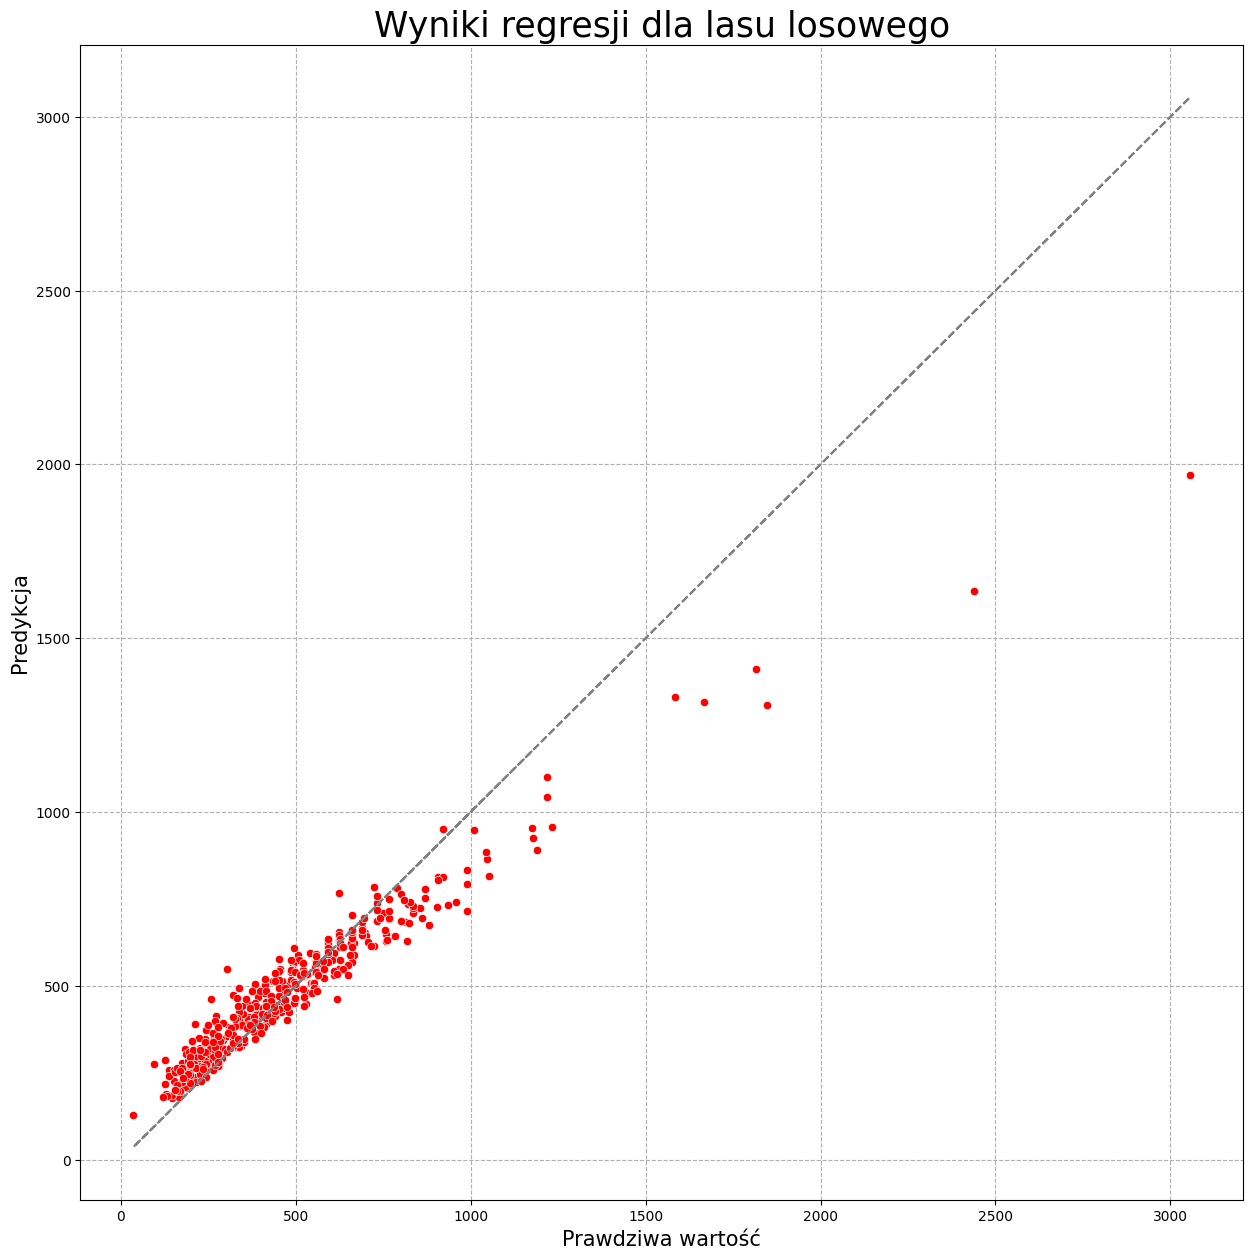

In [15]:
X = df.drop(columns=['class'])
y = df['class']
y_pred = regressors['forest'].predict(X)

plt.figure(figsize=(15, 15))
sns.scatterplot(pd.DataFrame({'actual': y, 'prediction': y_pred}), x='actual', y='prediction', color='red')
plt.plot(y, y, linestyle='--', color='gray')
plt.grid(linestyle='--')
plt.title("Wyniki regresji dla lasu losowego", fontsize=25)
plt.xlabel("Prawdziwa wartość", fontsize=15)
plt.ylabel("Predykcja", fontsize=15)
plt.savefig("results_tree.png")
plt.show()

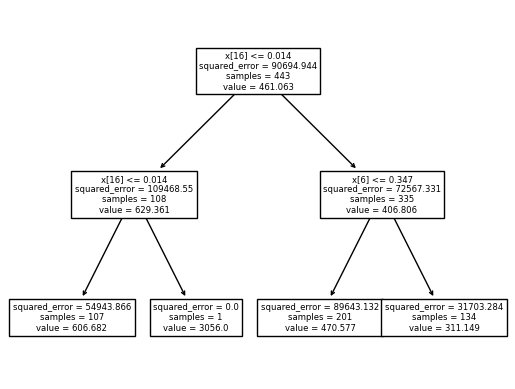

In [16]:
from sklearn import tree
tree.plot_tree(regressors['tree_max_depth_2']);
plt.savefig("tree.png")

In [22]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

mae = make_scorer(mean_absolute_error)
mape = make_scorer(mean_absolute_percentage_error)
medae = make_scorer(median_absolute_error)

regressors_std = {
    'linear_scaled': make_pipeline(StandardScaler(), linear_model.LinearRegression()),
    'ridge_scaled': make_pipeline(StandardScaler(), linear_model.Ridge()),
    'lasso_scaled': make_pipeline(StandardScaler(), linear_model.Lasso()),
    'knn_scaled': make_pipeline(StandardScaler(), neighbors.KNeighborsRegressor()),
    'tree_max_depth_2': DecisionTreeRegressor(max_depth=2),
    'tree': DecisionTreeRegressor(),
    'nn_scaled': make_pipeline(StandardScaler(), MLPRegressor(max_iter=10000)),
    'svm_linear_scaled': make_pipeline(StandardScaler(), SVR(kernel='linear')),
    'svm_rbf_scaled': make_pipeline(StandardScaler(), SVR(kernel='rbf')),
    'forest': RandomForestRegressor()
}

X = df.drop(columns=['class'])
y = df['class']

df_metrics = pd.DataFrame(columns=['MAE', 'MAPE', 'MedAE'])
metrics = []
for name, regressor in regressors_std.items():
    scores = cross_validate(regressor, X, y, scoring={'mae': mae, 'mape': mape, 'medae': medae}, cv=10)
    metrics.append({'name': name, 'MAE': scores['test_mae'].mean(), 'MAPE': scores['test_mape'].mean(), 'MedAE': scores['test_medae'].mean()})

df_metrics_cv = pd.DataFrame(metrics)
df_metrics_cv

,name,MAE,MAPE,MedAE
0,linear_scaled,220.043965,0.649025,170.893613
1,ridge_scaled,212.976359,0.622386,167.154905
2,lasso_scaled,203.355630,0.584464,160.966462
3,knn_scaled,220.633737,0.630315,164.445000
4,tree_max_depth_2,217.980346,0.611195,172.932549
5,tree,272.157879,0.747111,202.450000
6,nn_scaled,277.571881,0.834396,199.169429
7,svm_linear_scaled,190.177003,0.461981,144.323365
8,svm_rbf_scaled,216.333152,0.560806,171.280042
9,forest,207.906677,0.608279,161.970500


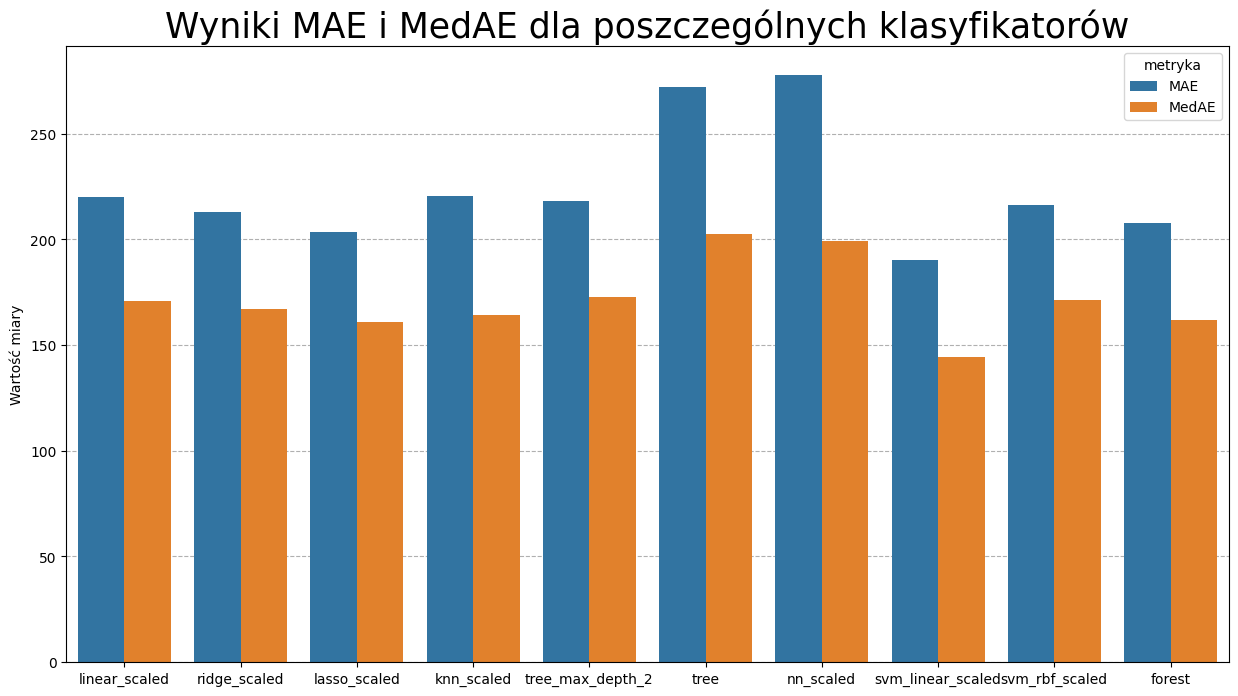

In [23]:
plt.figure(figsize=(15, 8))
df_melted = pd.melt(df_metrics_cv.drop(columns='MAPE'), id_vars=['name'], var_name='metryka', value_name='metric_value')
ax = sns.barplot(data=df_melted, x='name', y='metric_value', hue='metryka')

# plt.xticks(rotation=90)
plt.title("Wyniki MAE i MedAE dla poszczególnych klasyfikatorów", fontsize=25)
plt.xlabel("")
plt.ylabel("Wartość miary")
plt.rc('axes', axisbelow=True)
plt.grid(linestyle='--', axis='y')
plt.savefig("metrics_mae_medae_cv.png")
plt.show();

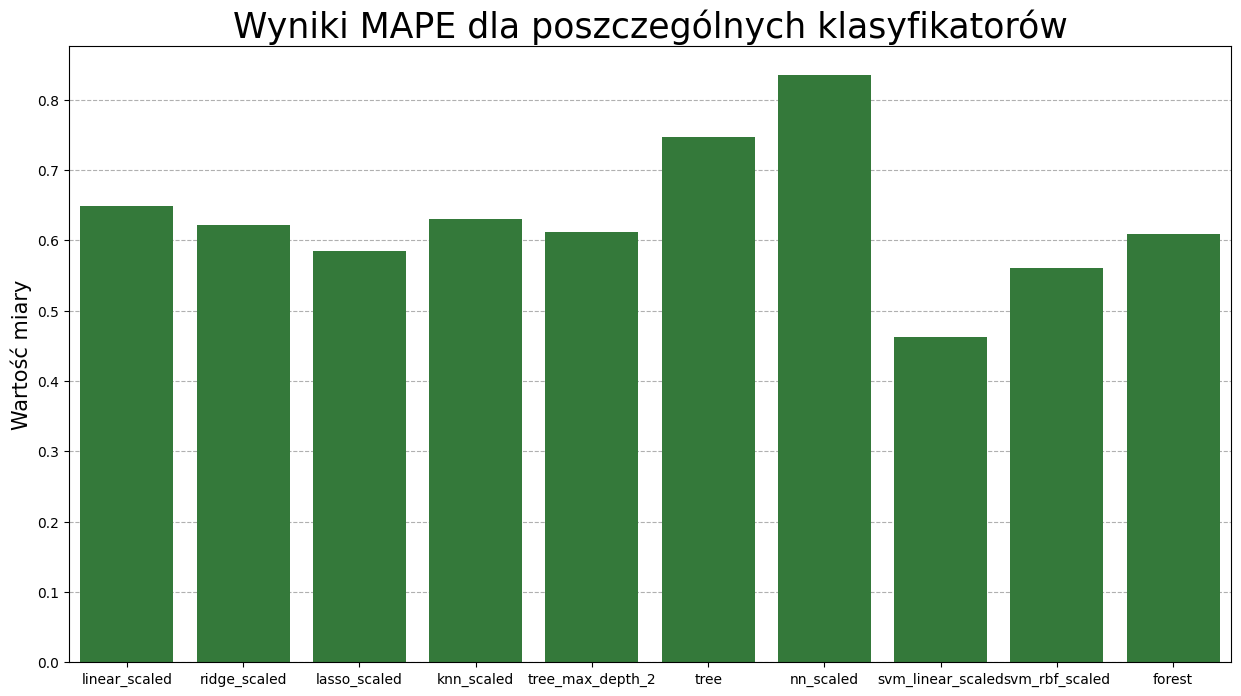

In [25]:
plt.figure(figsize=(15, 8))
df_melted = pd.melt(df_metrics_cv.drop(columns=['MAE', 'MedAE']), id_vars=['name'], var_name='metryka', value_name='metric_value')
ax = sns.barplot(data=df_melted, x='name', y='metric_value', color='#288531')

# plt.xticks(rotation=90)
plt.title("Wyniki MAPE dla poszczególnych klasyfikatorów", fontsize=25)
plt.xlabel("")
plt.ylabel("Wartość miary", fontsize=15)
plt.rc('axes', axisbelow=True)
plt.grid(linestyle='--', axis='y')
plt.savefig("metrics_mape_cv.png")
plt.show();